# Coding and Financial Analysis

In [1]:
#Setup 
from dotenv import load_dotenv

import os

load_dotenv()
API_KEY = os.getenv("OPENAI_KEY")

In [2]:
llm_config = {"model": "gpt-4-turbo", "api_key": API_KEY}

## Freestyle Coding

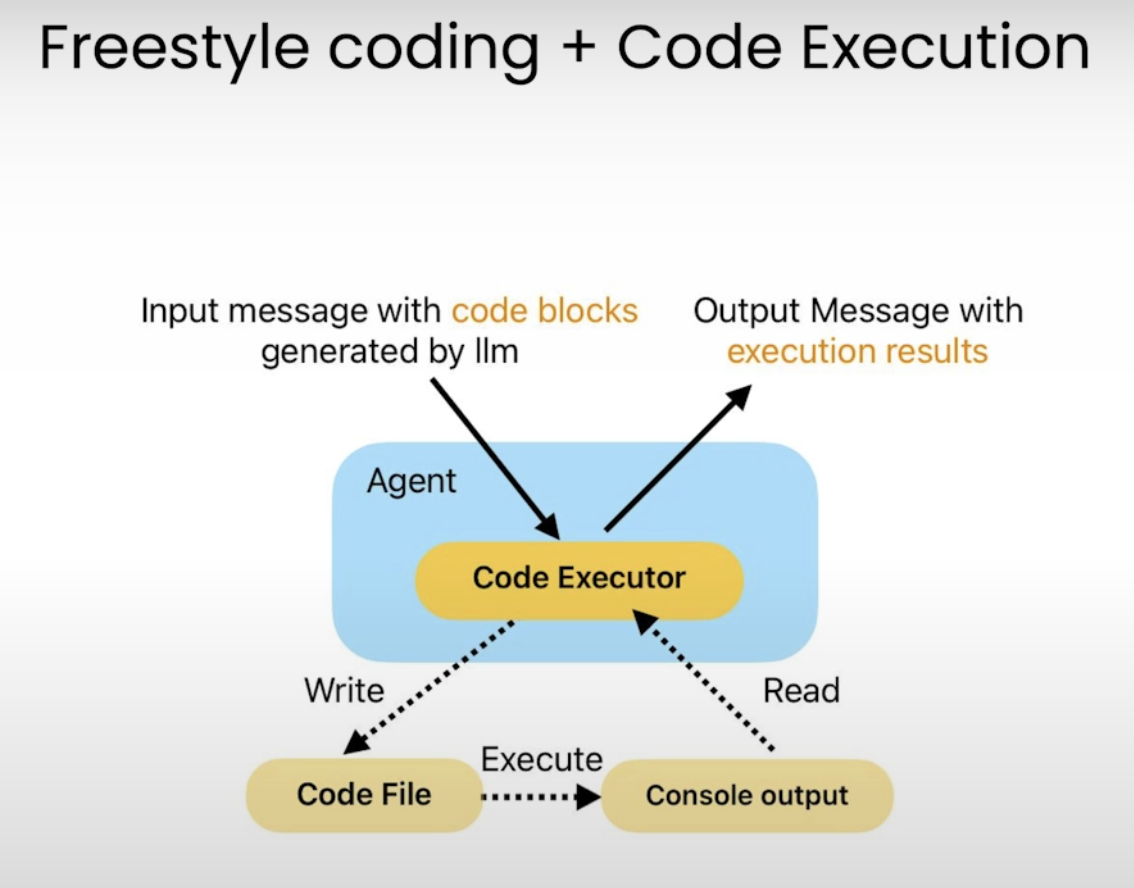

In [3]:
from IPython.display import Image

Image(filename='../assets/free_style_coding_execution.png')

### Define a code executor

In [4]:
from autogen.coding import LocalCommandLineCodeExecutor
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
)

### Create Agents:

In [5]:
from autogen import ConversableAgent, AssistantAgent

Agent with code executor configuration

In [6]:
code_executor_agent = ConversableAgent( #Doesnt need an LLM, it will just perform the code execution
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS", #Always ask for human input conformation, before executing code
    default_auto_reply="Please continue. If everything is done, reply 'TERMINATE'.",
)

Agent with code writing capabilities:

In [7]:
code_writer_agent = AssistantAgent(# Especial class of conversable agent with a default system message about how to write code and different conditions to solve a task
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False, #This agent will generate code but will not execute it. 
    human_input_mode="NEVER"
)

In [8]:
code_writer_agent_system_message = code_writer_agent.system_message
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

### Task:
Ask the agents to collaborate on an stock analysis task.

In [9]:
import datetime

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
"Create a time series plot showing stock gain YTD for NVDA and TLSA for the last 6 months."\
"Make sure the code is in markdown code block and save the figure"\
" to a file ytd_stock_gains.png."""

In [10]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message
)

code_executor_agent (to code_writer_agent):

Today is 2024-08-04. Create a time series plot showing stock gain YTD for NVDA and TLSA for the last 6 months.Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To create a time series plot for the YTD (Year-To-Date) gains for NVIDIA (NVDA) and Tesla (TSLA) over the last 6 months using Python, we will:

1. Fetch the stock data for NVDA and TSLA using the `yfinance` library from Yahoo Finance.
2. Calculate the YTD gains for both stocks.
3. Plot the data using `matplotlib` library.
4. Save the plot to a PNG file named `ytd_stock_gains.png`.

Here is a self-contained Python script to perform these tasks:

```python
# filename: plot_stock_gains.py

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def fetch_stock_data(ticker, start_date):
    stock_dat

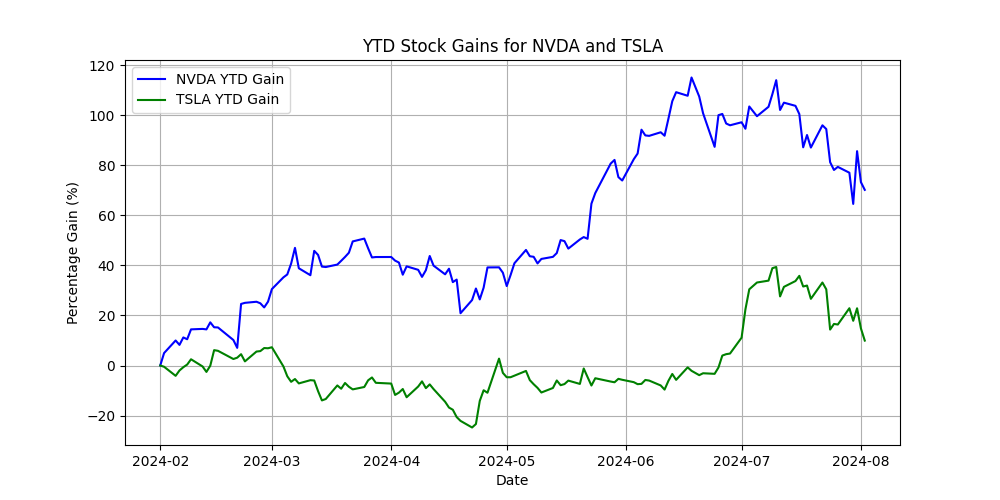

In [11]:
from IPython.display import Image

Image(os.path.join('coding','ytd_stock_gains.png'))

### Provide User-Defined Functions

In [12]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format 
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.
    
    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock 
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the 
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

Create an executor for the user defined functions:

In [13]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)

In [14]:
#We are adding some additional prompts that contain the knowledge of this function
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

Create the code writer agent with the New Instructions

In [15]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [16]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply="Please continue. If everything is done, reply 'TERMINATE'.",
)

In [17]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message = f"Today is {today}. "\
    "Create a time series plot showing stock gain YTD for NVDA and TLSA for the last 6 months."\
    "Make sure the code is in markdown code block and save the figure"\
    " to a file stock_prices_YTD.png."""
)

code_executor_agent (to code_writer_agent):

Today is 2024-08-04. Create a time series plot showing stock gain YTD for NVDA and TLSA for the last 6 months.Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Here is a step-by-step plan to create a time series plot showing the Year-To-Date (YTD) stock gain for NVDA (I assume you meant NVIDIA, ticker symbol "NVDA") and "TLSA" (assuming a typo, I consider the correct ticker symbol to be "TSLA" for Tesla, Inc.):

1. Calculate 6 months back from the current date to set the start date for data retrieval.
2. Use the `get_stock_prices` function to retrieve stock prices for "NVDA" and "TSLA" from 6 months ago to today (2024-08-04).
3. Plot the retrieved data and save the plot to a file named 'stock_prices_YTD.png'.

Here's how you can do this. Execute the following Python code

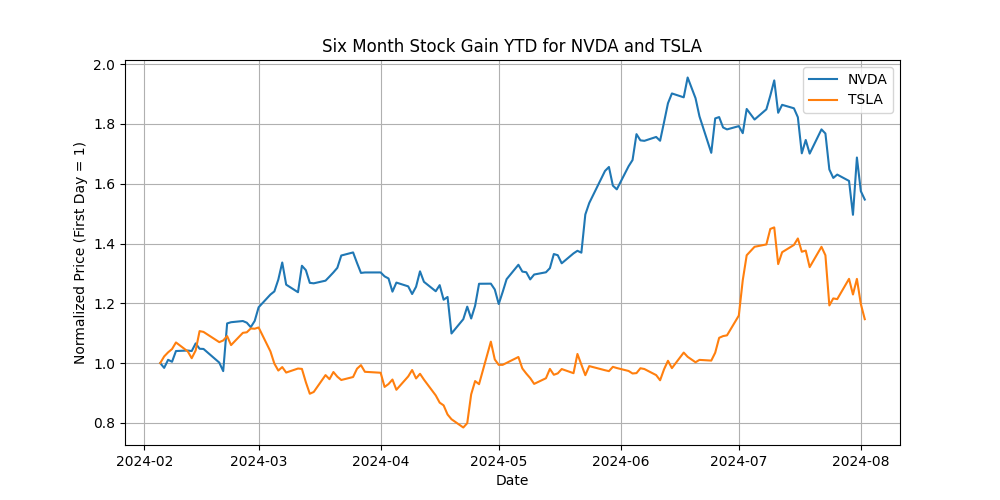

In [18]:
from IPython.display import Image

Image(os.path.join('coding','stock_prices_YTD.png'))